In [ ]:
# Mounting Google Drive locally
# Mount MyDrive on runtime using authoriazation code.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'05252021-05302021 BF Notes.gdoc'
 06212021.gdoc
'06222021 Notes BF - Dave S.gdoc'
'101421_BF_LaCasita45_FS (1).zip'
'2021_basic_scenarios_7-9 (1).PDF'
 2021_basic_scenarios_7-9.PDF
 2021_Tax_and_EIC_tables.PDF
'2022 Goals.gdoc'
 65673226406__305AFD89-3810-449D-BEA2-BAAA3D9356A0.HEIC
'Agenda 08.18.2021.docx'
 agreement.pdf
 AI
 air-quality
'Alteryx Automation + Digital Transformation - Use Case   Notes.gdoc'
'AMPED volunteer.gdoc'
'Amy Smock - Emerging Trends notes 10 19 2021.gdoc'
'anne ensign.gdoc'
 annual_aqi_by_cbsa_2019.csv
 annual_aqi_by_cbsa_2019.csv.gsheet
 annual_aqi_by_cbsa_2019.gsheet
 annual_aqi_by_cbsa_2020.csv.gsheet
 annual_aqi_by_cbsa_2020.gsheet
'arielle and dave 1:1 10 06 2021.gdoc'
'Arielle + Jenna_1:1 Meeting Notes.gdoc'
'arielle + Jenna mtg_07072021.gdoc'
'ARM 2.4 - Meeting Notes_07 2021.gdoc'
'ARM 2.4 - Questions_07272021.gdoc'
'ARM Global Harmonized + Financial Data.gdoc'
'ARM Open Session - Pair Programming.gdoc'
'Base Incremental Dashboard: https:  tsp.gdoc'
'b

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Feature: Read data from an external file, such as text, JSON, CSV, etc and use that data in your application
#Feature: Create and call at least 3 functions or methods, at least one of which must return a value that is used somewhere else in your code.
#Feature: Use pandas, matplotlib, and/or numpy to perform a data analysis project. Ingest 2 or more pieces of data, analyze that data in some manner, and display a new result to a graph, chart, or other display
#Feature: Create a dictionary or list, populate it with several values, retrieve at least one value, and use it in your program
#Feature: Visualize data in a graph, chart, or other visual representation of data

# Read the data files and do data cleaning up
def read_csv_file(file_name,year):
    df = pd.read_csv(file_name) #Read the file
    df = df[['CBSA','Good Days']] # Select only useful columns
    new_name = 'Good Days'+'_'+ str(year) # Add year into the column name
    df.rename(columns= {'Good Days':new_name}, inplace=True) # Rename the column 'Good Days'
    return df
    
    
df1 = read_csv_file ('/content/drive/MyDrive/annual_aqi_by_cbsa_2019.csv', 2019)
df2 = read_csv_file ('/content/drive/MyDrive/annual_aqi_by_cbsa_2020.csv', 2020)

#Combine the two data sets using outer join
combined_df = pd.merge(df1, df2, on='CBSA', how='outer')

combined_df

,CBSA,Good Days_2019,Good Days_2020
0,"Aberdeen, SD",112.0,166.0
1,"Aberdeen, WA",348.0,242.0
2,"Adjuntas, PR",108.0,18.0
3,"Adrian, MI",286.0,149.0
4,"Akron, OH",278.0,203.0
...,...,...,...
525,"York-Hanover, PA",299.0,201.0
526,"Youngstown-Warren-Boardman, OH-PA",276.0,227.0
527,"Yuba City, CA",239.0,162.0
528,"Yuma, AZ",265.0,206.0


In [33]:
# Select the last two letters as abbreviation of state name
def last_N_characters(whole_string, N):
    string_length = len(whole_string)
    starting_index = string_length - int(N)
    return whole_string[starting_index:string_length]

def last_2_characters(whole_string):
    return last_N_characters(whole_string, 2) # call a function in another function

combined_df['state'] = combined_df['CBSA'].apply(last_2_characters) # Use the apply() function to get a new column
combined_df

,CBSA,Good Days_2019,Good Days_2020,state
0,"Aberdeen, SD",112.0,166.0,SD
1,"Aberdeen, WA",348.0,242.0,WA
2,"Adjuntas, PR",108.0,18.0,PR
3,"Adrian, MI",286.0,149.0,MI
4,"Akron, OH",278.0,203.0,OH
...,...,...,...,...
525,"York-Hanover, PA",299.0,201.0,PA
526,"Youngstown-Warren-Boardman, OH-PA",276.0,227.0,PA
527,"Yuba City, CA",239.0,162.0,CA
528,"Yuma, AZ",265.0,206.0,AZ


In [34]:
# Add one column for regions based on the state abbreviation

states_regions = {
        'AK': 'Other',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'North East',
        'DC': 'North East',
        'DE': 'North East',
        'FL': 'South',
        'GA': 'South',
        'HI': 'Other',
        'IA': 'Mid West',
        'ID': 'West',
        'IL': 'Mid West',
        'IN': 'Mid West',
        'KS': 'Mid West',
        'KY': 'South',
        'LA': 'South',
        'MA': 'North East',
        'MD': 'North East',
        'ME': 'North East',
        'MI': 'West',
        'MN': 'Mid West',
        'MO': 'Mid West',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'Mid West',
        'NE': 'West',
        'NH': 'North East',
        'NJ': 'North East',
        'NM': 'West',
        'NV': 'West',
        'NY': 'North East',
        'OH': 'Mid West',
        'OK': 'South',
        'OR': 'West',
        'PA': 'North East',
        'RI': 'North East',
        'SC': 'South',
        'SD': 'Mid West',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'North East',
        'WA': 'West',
        'WI': 'Mid West',
        'WV': 'South',
        'WY': 'West'
}

combined_df['region'] = combined_df['state'].map(states_regions) # Add one column for region using map() function
combined_df

,CBSA,Good Days_2019,Good Days_2020,state,region
0,"Aberdeen, SD",112.0,166.0,SD,Mid West
1,"Aberdeen, WA",348.0,242.0,WA,West
2,"Adjuntas, PR",108.0,18.0,PR,NaN
3,"Adrian, MI",286.0,149.0,MI,West
4,"Akron, OH",278.0,203.0,OH,Mid West
...,...,...,...,...,...
525,"York-Hanover, PA",299.0,201.0,PA,North East
526,"Youngstown-Warren-Boardman, OH-PA",276.0,227.0,PA,North East
527,"Yuba City, CA",239.0,162.0,CA,West
528,"Yuma, AZ",265.0,206.0,AZ,West


In [35]:
# Calculate Descriptive Statistics for each region 
#https://stackoverflow.com/questions/19852586/get-mean-value-avoiding-nan-using-numpy-in-python

combined_df.groupby('region').describe()

Good Days_2019                                               \
                    count        mean        std    min     25%    50%   
region                                                                   
Mid West            112.0  260.812500  68.297512  101.0  216.25  283.5   
North East           72.0  306.680556  48.220686  129.0  286.25  318.5   
Other                 7.0  315.142857  51.236148  230.0  285.00  339.0   
South               170.0  260.223529  65.614415    7.0  231.25  269.5   
West                163.0  263.466258  79.865031   32.0  228.50  286.0   

                          Good Days_2020                                \
               75%    max          count        mean        std    min   
region                                                                   
Mid West    313.00  356.0          110.0  178.145455  62.103027   19.0   
North East  342.75  360.0           70.0  203.728571  41.364033   34.0   
Other       352.00  363.0            7.0  176.000000  33.466401  132.0   
South       308.00  352.0          165.0  181.630303  55.783906   20.0   
West        326.50  363.0          161.0  173.347826  56.599167   12.0   

                                         
               25%    50%    75%    max  
region                                   
Mid West    146.25  185.5  231.0  273.0  
North East  175.25  206.0  233.0  295.0  
Other       163.00  174.0  179.0  242.0  
South       150.00  181.0  224.0  274.0  
West        148.00  177.0  213.0  272.0

In [36]:
#Reshape the dataFrame for plotting

combined_df.rename(columns= {'Good Days_2019':'2019',
                             'Good Days_2020':'2020'}, inplace=True) # Rename the column 'Good Days'
melted_df = pd.melt(combined_df, id_vars=['region'], value_vars=['2019','2020'], 
                    var_name='year', value_name='Good Days') # using melt to reshape the dataFrame
melted_df

,region,year,Good Days
0,Mid West,2019,112.0
1,West,2019,348.0
2,NaN,2019,108.0
3,West,2019,286.0
4,Mid West,2019,278.0
...,...,...,...
1055,North East,2020,201.0
1056,North East,2020,227.0
1057,West,2020,162.0
1058,West,2020,206.0


Text(0.5, 1.0, 'Good days in 2019 and 2020')

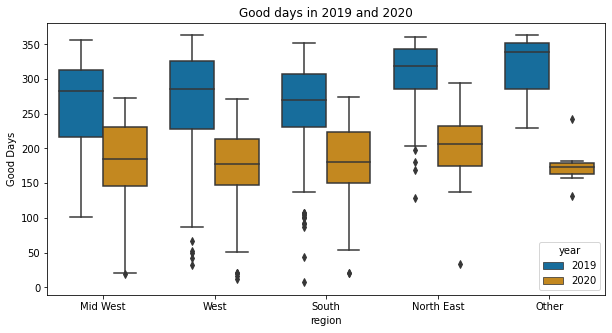

In [37]:
# Make A Grouped Boxplot in Python with Seaborn
# https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/
plt.figure(figsize=(10, 5))
sns.boxplot(y='Good Days', x='region', 
                 data=melted_df, 
                 palette="colorblind",
                 hue='year').set_title("Good days in 2019 and 2020")